In [1]:
import pandas as pd

In [5]:
df7 = pd.read_csv('betterlifeindex_2019.csv')  
df7.rename(columns={"Country": "Country Name"}, inplace=True)
df7 = df7[["LOCATION", "Country Name","Indicator", "Value"]].loc[(df7["Inequality"]=="Total")]
df8 = df7.loc[(df7["Indicator"]=="Life expectancy")][["Country Name", "LOCATION", "Value"]]
df8.rename(columns={"Value": "Life_expectancy_2019"}, inplace=True)
df9 = df7.loc[(df7["Indicator"]=="Homicide rate")][["Country Name", "LOCATION", "Value"]]
df9.rename(columns={"Value": "Homicide_rate_2019"}, inplace=True)
df10 = df7.loc[(df7["Indicator"]=="Life satisfaction")][["Country Name", "LOCATION", "Value"]]
df10.rename(columns={"Value": "Life satisfaction_2019"}, inplace=True)
df11 = df7.loc[(df7["Indicator"]=="Employees working very long hours")][["Country Name", "LOCATION", "Value"]]
df11.rename(columns={"Value": "Employees_working_hours_2019"}, inplace=True)
df12 = df7.loc[(df7["Indicator"]=="Time devoted to leisure and personal care")][["Country Name", "LOCATION", "Value"]]
df12.rename(columns={"Value": "leisure_and_personal_care_2019"}, inplace=True)
df13 = df7.loc[(df7["Indicator"]=="Voter turnout")][["Country Name", "LOCATION", "Value"]]
df13.rename(columns={"Value": "Voter_turnout_2019"}, inplace=True)
df7 = df7.loc[(df7["Indicator"]=="Self-reported health")][["Country Name", "LOCATION", "Value"]]
df7.rename(columns={"Value": "Self-reported_health_2019"}, inplace=True)
df8 = df8.set_index('Country Name')
df8

,LOCATION,Life_expectancy_2019
Country Name,,
Australia,AUS,82.5
Austria,AUT,81.7
Belgium,BEL,81.5
Canada,CAN,81.9
Czech Republic,CZE,79.1
Denmark,DNK,80.9
Finland,FIN,81.5
France,FRA,82.4
Germany,DEU,81.1


In [6]:
vax_rate = pd.read_csv('./COVID-19_vaccination_rates.csv')

In [7]:
vax_rate = vax_rate[['location', 'people_fully_vaccinated_per_hundred']].groupby(['location']).max()
vax_rate

,people_fully_vaccinated_per_hundred
location,
Afghanistan,8.95
Africa,7.72
Albania,34.15
Algeria,12.08
Andorra,64.04
...,...
Wallis and Futuna,53.39
World,45.05
Yemen,1.20


In [9]:
df = pd.merge(vax_rate, df8, left_index=True, right_index=True).rename(columns={'Deaths/1M population': 'deaths_per_million'})
df

,people_fully_vaccinated_per_hundred,LOCATION,Life_expectancy_2019
Australia,74.26,AUS,82.5
Austria,67.50,AUT,81.7
Belgium,75.03,BEL,81.5
Brazil,64.60,BRA,74.8
Canada,76.59,CAN,81.9
Chile,84.64,CHL,79.9
Colombia,49.78,COL,76.2
Denmark,77.04,DNK,80.9
Estonia,60.19,EST,77.8
Finland,73.13,FIN,81.5


In [10]:
import matplotlib.pyplot as plt

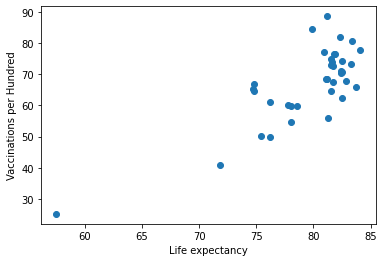

In [12]:
plt.scatter(df['Life_expectancy_2019'], df['people_fully_vaccinated_per_hundred'])
plt.xlabel('Life expectancy')
plt.ylabel('Vaccinations per Hundred')
plt.show()